# OLS - Wooldridge Computer Exercise
## Chapter 4, Exercise 8

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

# References
- Wooldridge, J.M. (2016). Introductory econometrics: A modern approach (6thed.). Mason, OH: South-Western, Cengage Learning.
- Residual Plots: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Understanding residual plots: https://data.library.virginia.edu/diagnostic-plots/

# Instantiate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.formula.api import ols
from statsmodels.compat import lzip

from statsmodels.graphics.gofplots import ProbPlot

#import pandas.tseries.api as sm
#from tseries.formula.apt import ols

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Latex markup language 
from IPython.display import Latex

# Data Read from csv

In [2]:
%%time
#df = pd.read_csv(BytesIO(csv_as_bytes),sep='|',nrows=100000)
df1 = pd.read_stata('C://Users//mvrie//Downloads//firepit-master//401ksubs.dta')
print(df1.head())

   e401k        inc  marr  male  age  fsize      nettfa  p401k  pira  \
0      0  13.170000     0     0   40      1    4.575000      0     1   
1      1  61.230000     0     1   35      1  154.000000      1     0   
2      0  12.858000     1     0   44      2    0.000000      0     0   
3      0  98.879997     1     1   44      2   21.799999      0     0   
4      0  22.614000     0     0   53      1   18.450001      0     0   

         incsq  agesq  
0   173.448898   1600  
1  3749.112793   1225  
2   165.328156   1936  
3  9777.253906   1936  
4   511.393005   2809  
Wall time: 21.9 ms


In [3]:
df1['constant'] = 1

# Data Checks
- Columns

In [4]:
%%time
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9275 entries, 0 to 9274
Data columns (total 12 columns):
e401k       9275 non-null int8
inc         9275 non-null float32
marr        9275 non-null int8
male        9275 non-null int8
age         9275 non-null int8
fsize       9275 non-null int8
nettfa      9275 non-null float32
p401k       9275 non-null int8
pira        9275 non-null int8
incsq       9275 non-null float32
agesq       9275 non-null int16
constant    9275 non-null int64
dtypes: float32(3), int16(1), int64(1), int8(7)
memory usage: 335.1 KB
Wall time: 5.93 ms


### Question i: How many single households are there?

In [6]:
# Isolate single person households for this exercise.
qty_households = np.sum(df1['constant'])
print('The total number of households is: ' + str(qty_households))
print('Check out the formatting...')
print('The total number of households is: {:,d}'.format(qty_households))
print(' ')
df2 = df1[df1['fsize'] == 1]
qty_households = np.sum(df2['constant'])
print('The total number of single person households is: ' + str(qty_households))
print('Check out the formatting...')
print('The total number of single person households is: {:,d}'.format(qty_households))

The total number of households is: 9275
Check out the formatting...
The total number of households is: 9,275
 
The total number of single person households is: 2017
Check out the formatting...
The total number of single person households is: 2,017


### Question ii: Estimate: $nettfa = \alpha + \beta_{1}inc + \beta_{2}age + \mu$ 
### ...using just the single person households.

In [8]:
formula = '''nettfa ~ inc + age
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df2)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())

                sum_sq      df           F        PR(>F)
inc       3.575377e+05     1.0  179.077898  3.450790e-39
age       1.674349e+05     1.0   83.862201  1.265959e-19
Residual  4.021048e+06  2014.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           2.63e-56
Time:                        18:12:56   Log-Likelihood:                -10524.
No. Observations:                2017   AIC:                         2.105e+04
Df Residuals:                    2014   BIC:                         2.107e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                        

### Question iv: 
### $H_{o}: \beta_{2} = 1$
### $H_{1}: \beta_{2} < 1$

In [9]:
hypotheses = 'age = 1'
t_test = results.t_test(hypotheses)
print(t_test)


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8427      0.092     -1.710      0.087       0.662       1.023


# Estimate: $nettfa = \alpha + \beta_{1}inc + \mu$

In [11]:
formula = '''nettfa ~ inc
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df2)
results2 = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results2, typ=2)
print(aov_table)
print(results2.summary())

                sum_sq      df           F        PR(>F)
inc       3.774821e+05     1.0  181.599486  1.076004e-39
Residual  4.188483e+06  2015.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                 nettfa   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.08e-39
Time:                        18:31:58   Log-Likelihood:                -10565.
No. Observations:                2017   AIC:                         2.113e+04
Df Residuals:                    2015   BIC:                         2.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err       

In [12]:
from statsmodels.iolib.summary2 import summary_col
dfoutput = summary_col([results,results2],stars=True)
print(dfoutput)


            nettfa I   nettfa II 
---------------------------------
Intercept -43.0398*** -10.5710***
          (4.0804)    (2.0607)   
age       0.8427***              
          (0.0920)               
inc       0.7993***   0.8207***  
          (0.0597)    (0.0609)   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Residual Plotting
- First add some setup variables from the "results" model output.

In [13]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

# Residual Plot
## non-linear plot line indicative of non-linear relationship not captured in model

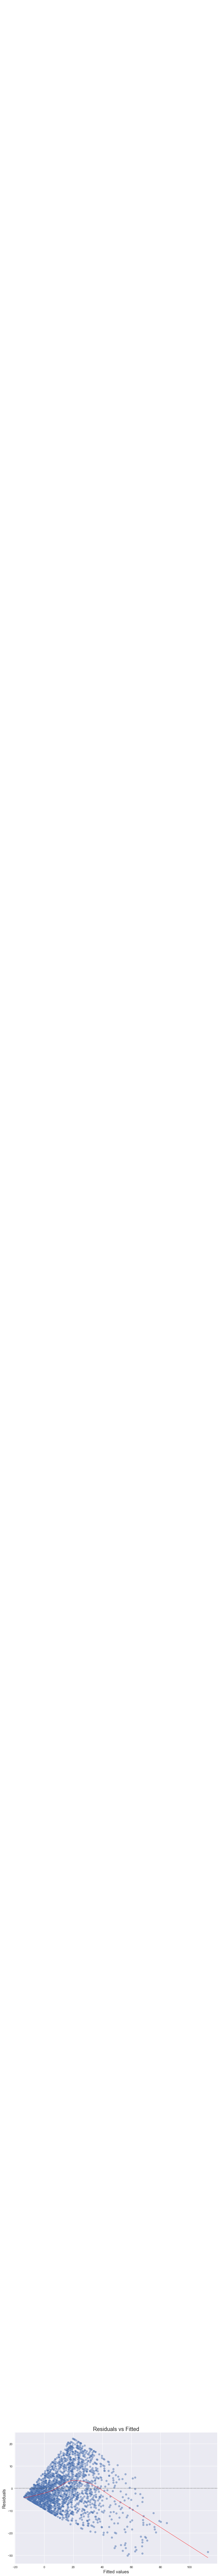

In [14]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'age', data=df2, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

# QQ Plot
- residuals following plot line well indicative of normally distributed residuals
- residuals that deviate sharply indicative of non-normally distributed residuals

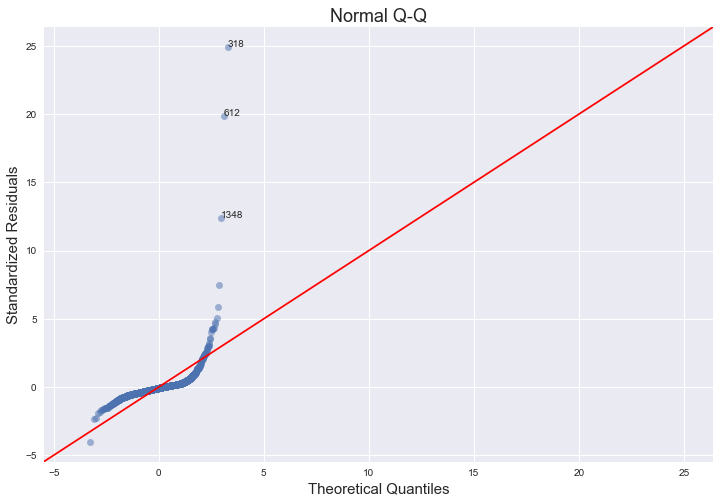

In [15]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# Scale Location Plot
## indicative of homoscedastic residuals
- Good to see even spread with horizontal line
- Bad to see sloped line with spread following a pattern

KeyError: 318

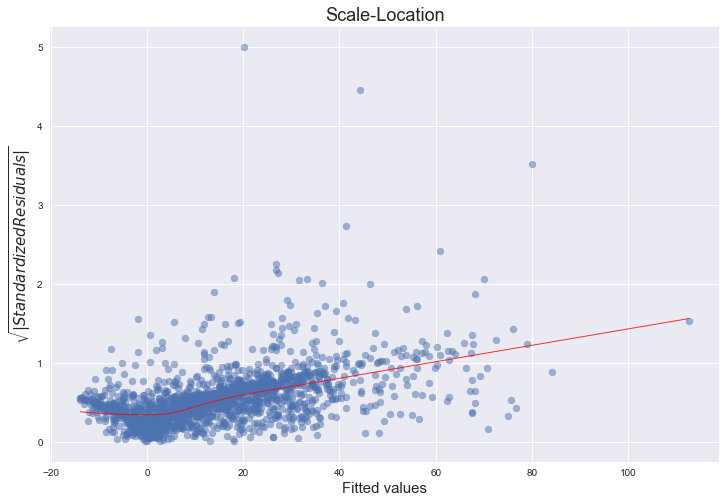

In [17]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

# Leverage Plot
## helps us find influential cases (outliers)

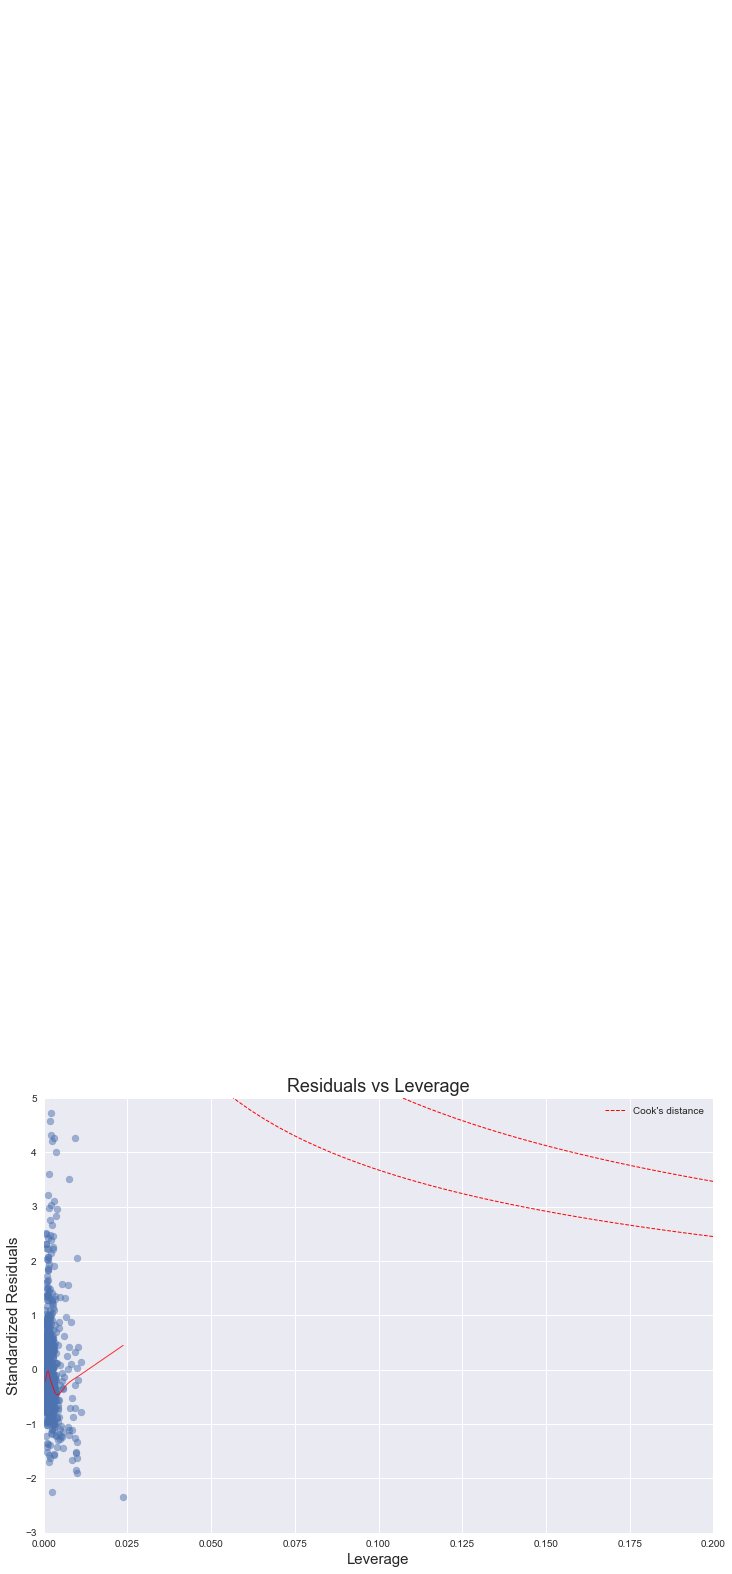

In [18]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');


In [19]:
print("Heteroscedasticity Test - Breusch Pagan")
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results2.resid, results2.model.exog)
lzip(name, test)

Heteroscedasticity Test - Breusch Pagan


[('Lagrange multiplier statistic', 8.741295004983014),
 ('p-value', 0.0031108351461216544),
 ('f-value', 8.77063766298197),
 ('f p-value', 0.0030969808492330346)]